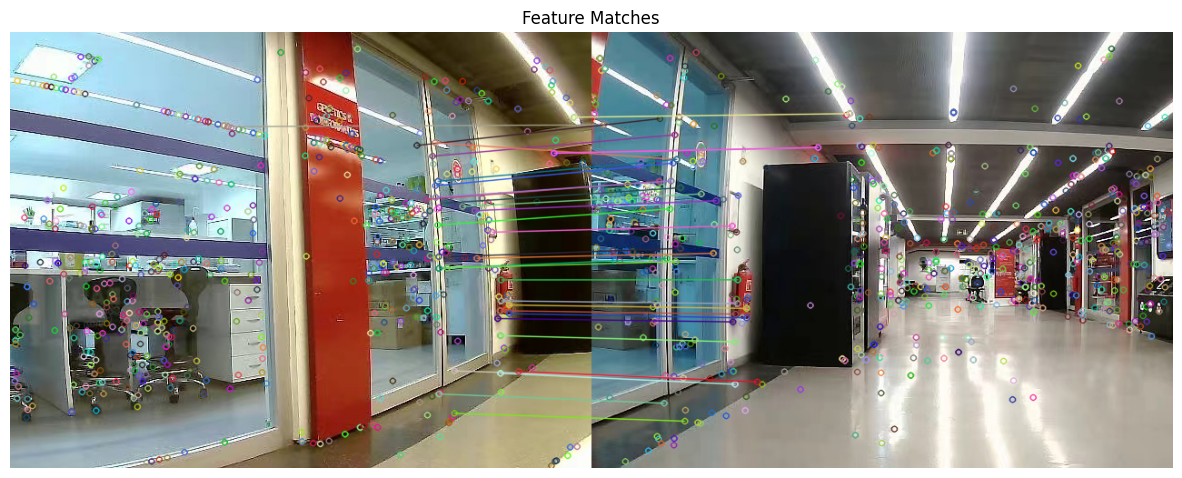

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Optional

def read_and_resize_images(img_path1: str, img_path2: str) -> Tuple[np.ndarray, np.ndarray]:
    """
    读取并调整两个图像的大小以匹配第一个图像的尺寸。
    
    Args:
        img_path1 (str): 第一个图像的文件路径。
        img_path2 (str): 第二个图像的文件路径。
    
    Returns:
        Tuple[np.ndarray, np.ndarray]: 调整大小后的两个图像。
    """
    img1 = cv.imread(img_path1)
    img2 = cv.imread(img_path2)
    
    height1, width1 = img1.shape[:2]
    img2 = cv.resize(img2, (width1, height1), interpolation=cv.INTER_AREA)
    
    return img1, img2

def detect_and_compute_sift_features(img: np.ndarray) -> Tuple[list, np.ndarray]:
    """
    使用SIFT算法检测图像中的关键点并计算描述子。
    
    Args:
        img (np.ndarray): 输入图像。
    
    Returns:
        Tuple[list, np.ndarray]: 关键点和描述子。
    """
    sift = cv.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    return keypoints, descriptors

def match_features(describe1: np.ndarray, describe2: np.ndarray) -> list:
    """
    使用FLANN算法匹配两个图像的特征描述子。
    
    Args:
        describe1 (np.ndarray): 第一个图像的描述子。
        describe2 (np.ndarray): 第二个图像的描述子。
    
    Returns:
        list: 优质匹配点对。
    """
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv.FlannBasedMatcher(index_params, search_params)
    
    matches = flann.knnMatch(describe1, describe2, k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.65 * n.distance:
            good_matches.append(m)
    
    return good_matches

def draw_matches(img1: np.ndarray, kp1: list, img2: np.ndarray, kp2: list, good_matches: list) -> np.ndarray:
    """
    绘制两个图像之间的特征匹配结果。
    
    Args:
        img1 (np.ndarray): 第一个图像。
        kp1 (list): 第一个图像的关键点。
        img2 (np.ndarray): 第二个图像。
        kp2 (list): 第二个图像的关键点。
        good_matches (list): 优质匹配点对。
    
    Returns:
        np.ndarray: 绘制了特征匹配结果的图像。
    """
    matched_img = cv.drawMatches(img1, kp1, img2, kp2, good_matches, None)
    return matched_img

def plot_matches(matched_img: np.ndarray) -> None:
    """
    使用Matplotlib显示特征匹配结果图像。
    
    Args:
        matched_img (np.ndarray): 绘制了特征匹配结果的图像。
    """
    plt.figure(figsize=(15, 10))
    plt.imshow(cv.cvtColor(matched_img, cv.COLOR_BGR2RGB))
    plt.title('Feature Matches')
    plt.axis('off')
    plt.show()

def match_and_draw_features(img_path1: str, img_path2: str, output_path: Optional[str] = None) -> None:
    """
    读取图像、检测特征、匹配特征，并绘制和显示特征匹配结果。
    
    Args:
        img_path1 (str): 第一个图像的文件路径。
        img_path2 (str): 第二个图像的文件路径。
        output_path (Optional[str]): 保存特征匹配结果图像的文件路径。如果未指定，则不保存。
    """
    img1, img2 = read_and_resize_images(img_path1, img_path2)
    kp1, describe1 = detect_and_compute_sift_features(img1)
    kp2, describe2 = detect_and_compute_sift_features(img2)
    good_matches = match_features(describe1, describe2)
    matched_img = draw_matches(img1, kp1, img2, kp2, good_matches)
    
    if output_path:
        cv.imwrite(output_path, matched_img)
    
    plot_matches(matched_img)

# 使用示例
match_and_draw_features('image1.jpg', 'image2.jpg', 'result.jpg')




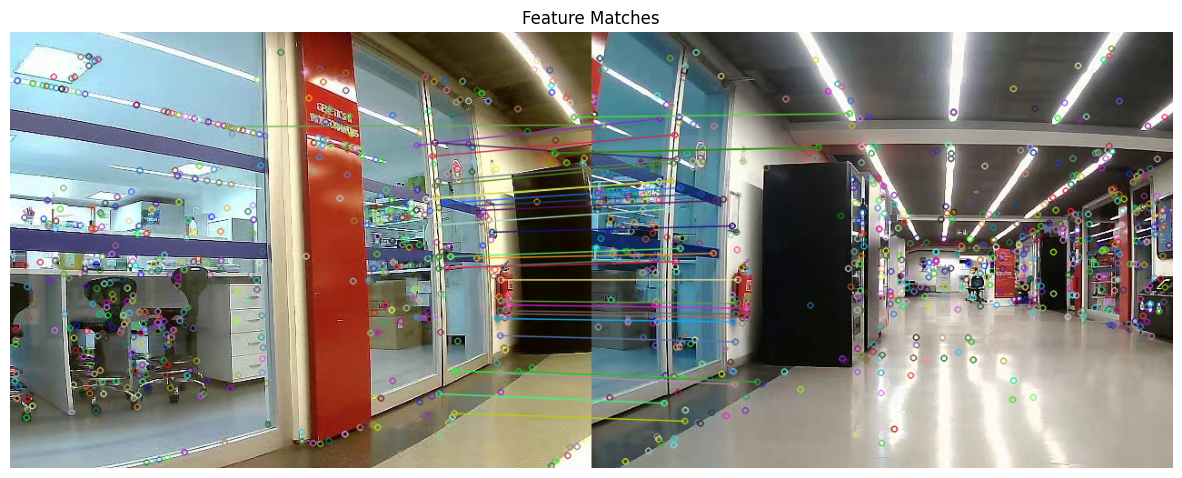

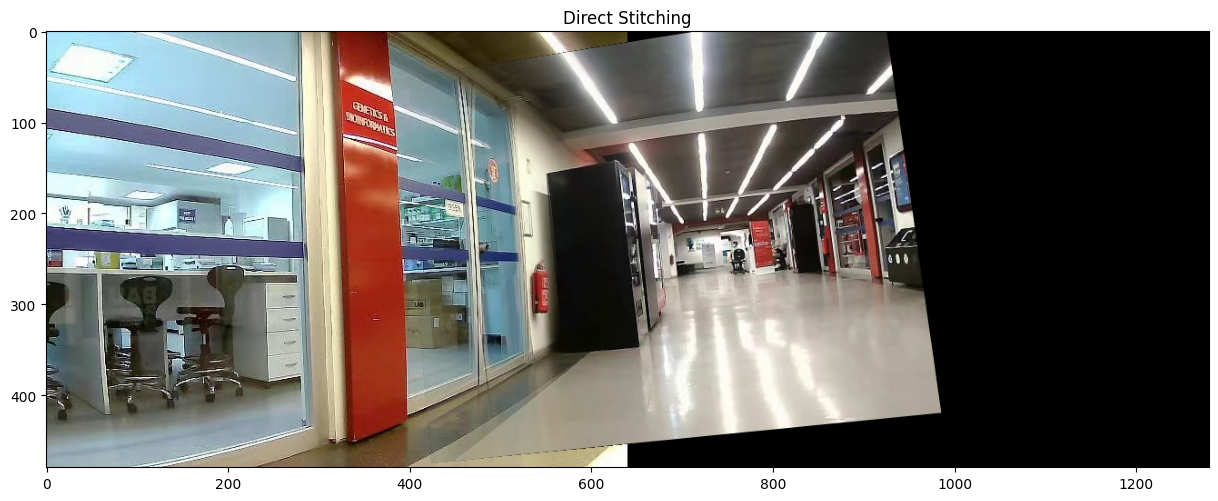

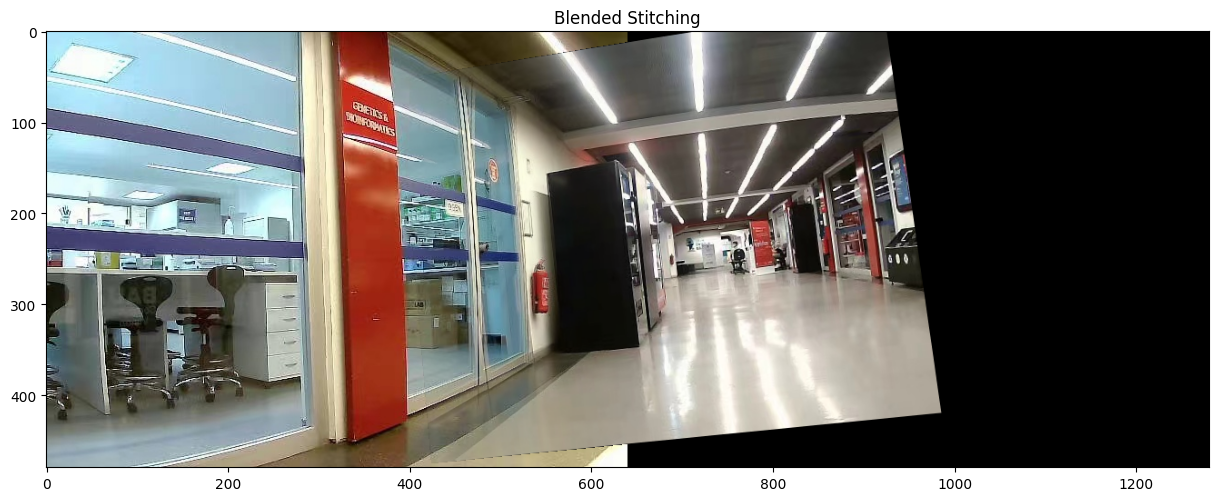

In [26]:



import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Optional, List

def read_and_resize_images(img_path1: str, img_path2: str) -> Tuple[np.ndarray, np.ndarray]:
    """
    读取两张图像并调整第二张图像的大小以匹配第一张图像的尺寸。

    参数:
    img_path1 (str): 第一张图像的路径。
    img_path2 (str): 第二张图像的路径。

    返回:
    Tuple[np.ndarray, np.ndarray]: 第一张图像和调整大小后的第二张图像。
    """
    img1 = cv.imread(img_path1)
    img2 = cv.imread(img_path2)
    
    if img1 is None or img2 is None:
        raise ValueError("无法读取图像，请检查图像路径是否正确")
    
    height1, width1 = img1.shape[:2]
    img2 = cv.resize(img2, (width1, height1), interpolation=cv.INTER_AREA)
    
    return img1, img2

def detect_and_compute_sift_features(img: np.ndarray) -> Tuple[List[cv.KeyPoint], np.ndarray]:
    """
    使用SIFT算法检测图像特征点并计算描述子。

    参数:
    img (np.ndarray): 输入图像。

    返回:
    Tuple[List[cv.KeyPoint], np.ndarray]: 特征点列表和描述子矩阵。
    """
    sift = cv.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    return keypoints, descriptors

def match_features(describe1: np.ndarray, describe2: np.ndarray) -> List[cv.DMatch]:
    """
    匹配两组图像描述子并筛选出好的匹配。

    参数:
    describe1 (np.ndarray): 第一组描述子。
    describe2 (np.ndarray): 第二组描述子。

    返回:
    List[cv.DMatch]: 筛选出的好的匹配。
    """
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv.FlannBasedMatcher(index_params, search_params)
    
    matches = flann.knnMatch(describe1, describe2, k=2)
    good_matches = [m for m, n in matches if m.distance < 0.65 * n.distance]
    
    return good_matches

def draw_matches(img1: np.ndarray, kp1: List[cv.KeyPoint], img2: np.ndarray, kp2: List[cv.KeyPoint], good_matches: List[cv.DMatch]) -> np.ndarray:
    """
    在两张图像之间绘制匹配的特征点。

    参数:
    img1 (np.ndarray): 第一张图像。
    kp1 (List[cv.KeyPoint]): 第一张图像的特征点。
    img2 (np.ndarray): 第二张图像。
    kp2 (List[cv.KeyPoint]): 第二张图像的特征点。
    good_matches (List[cv.DMatch]): 好的匹配点。

    返回:
    np.ndarray: 绘制了匹配特征点的图像。
    """
    matched_img = cv.drawMatches(img1, kp1, img2, kp2, good_matches, None)
    return matched_img

def plot_matches(matched_img: np.ndarray) -> None:
    """
    显示匹配特征点的图像。

    参数:
    matched_img (np.ndarray): 绘制了匹配特征点的图像。
    """
    plt.figure(figsize=(15, 10))
    plt.imshow(cv.cvtColor(matched_img, cv.COLOR_BGR2RGB))
    plt.title('Feature Matches')
    plt.axis('off')
    plt.show()

def save_matches(matched_img: np.ndarray, output_path: str) -> None:
    """
    保存匹配特征点的图像。

    参数:
    matched_img (np.ndarray): 绘制了匹配特征点的图像。
    output_path (str): 保存图像的路径。
    """
    cv.imwrite(output_path, matched_img)

def match_and_draw_features(img_path1: str, img_path2: str, output_path: Optional[str] = None) -> None:
    """
    读取图像、检测特征、匹配特征并绘制匹配结果。

    参数:
    img_path1 (str): 第一张图像的路径。
    img_path2 (str): 第二张图像的路径。
    output_path (Optional[str]): 保存匹配结果的路径，如果为None，则不保存。
    """
    img1, img2 = read_and_resize_images(img_path1, img_path2)
    kp1, describe1 = detect_and_compute_sift_features(img1)
    kp2, describe2 = detect_and_compute_sift_features(img2)
    good_matches = match_features(describe1, describe2)
    matched_img = draw_matches(img1, kp1, img2, kp2, good_matches)
    
    if output_path:
        save_matches(matched_img, output_path)
    
    plot_matches(matched_img)

def compute_homography_and_warp(img1: np.ndarray, kp1: List[cv.KeyPoint], img2: np.ndarray, kp2: List[cv.KeyPoint], good_matches: List[cv.DMatch], min_match_count: int = 10) -> Optional[np.ndarray]:
    """
    计算单应性矩阵并将第二张图像变换到第一张图像的平面上。

    参数:
    img1 (np.ndarray): 第一张图像。
    kp1 (List[cv.KeyPoint]): 第一张图像的特征点。
    img2 (np.ndarray): 第二张图像。
    kp2 (List[cv.KeyPoint]): 第二张图像的特征点。
    good_matches (List[cv.DMatch]): 好的匹配点。
    min_match_count (int): 最少匹配点数，默认值为10。

    返回:
    Optional[np.ndarray]: 变换后的图像，如果匹配点不足则返回None。
    """
    if len(good_matches) > min_match_count:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
        warp_img = cv.warpPerspective(img2, np.linalg.inv(M), (img1.shape[1] + img2.shape[1], img2.shape[0]))
        return warp_img
    else:
        print("匹配点不足！")
        return None

def stitch_images(img1: np.ndarray, warp_img: np.ndarray) -> np.ndarray:
    """
    拼接两张图像，使用加权平均的方法处理重叠区域。

    参数:
    img1 (np.ndarray): 第一张图像。
    warp_img (np.ndarray): 变换后的第二张图像。

    返回:
    np.ndarray: 拼接后的图像。
    """
    direct = warp_img.copy()
    direct[0:img1.shape[0], 0:img1.shape[1]] = img1
    rows, cols = img1.shape[:2]
    left, right = 0, cols
    
    for col in range(0, cols):
        if img1[:, col].any() and warp_img[:, col].any():
            left = col
            break
    
    for col in range(cols - 1, 0, -1):
        if img1[:, col].any() and warp_img[:, col].any():
            right = col
            break
    
    res = np.zeros([rows, cols, 3], np.uint8)
    for row in range(0, rows):
        for col in range(0, cols):
            if not img1[row, col].any():
                res[row, col] = warp_img[row, col]
            elif not warp_img[row, col].any():
                res[row, col] = img1[row, col]
            else:
                srcimg_len = float(abs(col - left))
                warpimg_len = float(abs(col - right))
                alpha = srcimg_len / (srcimg_len + warpimg_len)
                res[row, col] = np.clip(img1[row, col] * (1 - alpha) + warp_img[row, col] * alpha, 0, 255)
    
    warp_img[0:img1.shape[0], 0:img1.shape[1]] = res
    return warp_img

def plot_stitched_images(direct: np.ndarray, stitched: np.ndarray) -> None:
    """
    显示拼接后的图像。

    参数:
    direct (np.ndarray): 直接拼接的图像。
    stitched (np.ndarray): 加权平均拼接的图像。
    """
    plt.figure(figsize=(15, 10))
    img3 = cv.cvtColor(direct, cv.COLOR_BGR2RGB)
    plt.imshow(img3)
    plt.title('Direct Stitching')
    plt.show()
    
    plt.figure(figsize=(15, 10))
    img4 = cv.cvtColor(stitched, cv.COLOR_BGR2RGB)
    plt.imshow(img4)
    plt.title('Blended Stitching')
    plt.show()

# 使用示例
img1_path = 'image1.jpg'
img2_path = 'image2.jpg'
output_path = 'result1.jpg'

img1, img2 = read_and_resize_images(img1_path, img2_path)
kp1, describe1 = detect_and_compute_sift_features(img1)
kp2, describe2 = detect_and_compute_sift_features(img2)
good_matches = match_features(describe1, describe2)
matched_img = draw_matches(img1, kp1, img2, kp2, good_matches)

save_matches(matched_img, output_path)
plot_matches(matched_img)

warp_img = compute_homography_and_warp(img1, kp1, img2, kp2, good_matches)
if warp_img is not None:
    stitched_img = stitch_images(img1, warp_img)
    plot_stitched_images(direct=warp_img, stitched=stitched_img)




In [33]:
def read_frame_from_video(video_path: str, frame_number: int) -> np.ndarray:
    """
    从视频文件中读取特定帧。

    参数:
    video_path (str): 视频文件的路径。
    frame_number (int): 需要提取的帧的编号。

    返回:
    np.ndarray: 提取的帧。
    """
    cap = cv.VideoCapture(video_path)
    cap.set(cv.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    if not ret:
        raise ValueError(f"无法从 {video_path} 提取帧 {frame_number}")
    cap.release()
    return frame

def read_and_resize_images_from_videos(video_path1: str, video_path2: str, frame_number: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    从两个视频文件中读取特定帧并调整第二帧的大小以匹配第一帧。

    参数:
    video_path1 (str): 第一个视频文件的路径。
    video_path2 (str): 第二个视频文件的路径。
    frame_number (int): 需要提取的帧的编号。

    返回:
    Tuple[np.ndarray, np.ndarray]: 第一帧和调整大小后的第二帧。
    """
    img1 = read_frame_from_video(video_path1, frame_number)
    img2 = read_frame_from_video(video_path2, frame_number)
    
    height1, width1 = img1.shape[:2]
    img2 = cv.resize(img2, (width1, height1), interpolation=cv.INTER_AREA)
    
    return img1, img2

# 修改示例代码以使用视频提取帧
video1_path = '../data/testolabc1.avi'
video2_path = '../data/testolabc2.avi'
frame_number = 100  # 提取第100帧

In [35]:
img1, img2 = read_and_resize_images_from_videos(video1_path, video2_path, frame_number)

warp_img = compute_homography_and_warp(img1, kp1, img2, kp2, good_matches)
if warp_img is not None:
    stitched_img = stitch_images(img1, warp_img)
    # plot_stitched_images(direct=warp_img, stitched=stitched_img)


